In [341]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from featexp import get_univariate_plots, get_trend_stats
import warnings
import xgboost as xgb
warnings.filterwarnings("ignore")
%matplotlib inline

# Loading Dataset

### Choose Modeling Dataset to Use

In [342]:
def read_model_dataset(chosen, combine_cats = False):
    non_features = ['u_id', 'p_id']
    demo_cols = []
    predictor = ['pur']
    file_name = ""

    if chosen == 0:
        file_name = "minimal_preprocess.csv"
        demo_cols = ['gender', 'age', 'years_in_city', 'married', 'city', 'occ']
    elif chosen == 1:
        file_name = "some_one_hot.csv"
        demo_cols = ['gender', 'age', 'years_in_city', 'married', 'occ_0', 'occ_1', 'occ_10',
               'occ_11', 'occ_12', 'occ_13', 'occ_14', 'occ_15', 'occ_16', 'occ_17',
               'occ_18', 'occ_19', 'occ_2', 'occ_20', 'occ_3', 'occ_4', 'occ_5',
               'occ_6', 'occ_7', 'occ_8', 'occ_9', 'city_A', 'city_B', 'city_C']
    elif chosen == 2:
        file_name = "all_one_hot.csv"
        demo_cols = ['gender', 'married', 'age_0', 'age_1', 'age_2', 'age_3', 'age_4',
               'age_5', 'age_6', 'occ_0', 'occ_1', 'occ_10', 'occ_11', 'occ_12',
               'occ_13', 'occ_14', 'occ_15', 'occ_16', 'occ_17', 'occ_18', 'occ_19',
               'occ_2', 'occ_20', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_7', 'occ_8',
               'occ_9', 'city_0', 'city_1', 'city_2',
               'years_in_city_0', 'years_in_city_1', 'years_in_city_2',
               'years_in_city_3', 'years_in_city_4']
    else:
        file_name = "minimal_preprocess.csv"
        demo_cols = ['gender', 'age', 'years_in_city', 'married', 'city', 'occ']
    
    if combine_cats and chosen != 0:
        modeldf = pd.read_csv("inputs/p_combined_" + file_name)
    else:
        modeldf = pd.read_csv("inputs/" + file_name)
    modeldf = modeldf.drop(non_features, axis = 1)
    # line below removes purchase outliers from modeldf
    # modeldf = modeldf[modeldf["pur"] < modeldf["pur"].quantile(0.99)]
    X = modeldf.drop(predictor, axis = 1)
    y = modeldf[predictor]
    
    return modeldf, X, y, predictor, demo_cols

In [343]:
# minimal_preprocess = 0
# some_one_hot = 1
# all_one_hot = 2
# defaults to minimal_preprocess

modeldf, X, y, predictor, demo_cols = read_model_dataset(1, combine_cats = False)
modeldf.head()

,gender,age,years_in_city,married,pur,occ_0,occ_1,occ_10,occ_11,occ_12,...,p_cat_3_15,p_cat_3_16,p_cat_3_17,p_cat_3_18,p_cat_3_3,p_cat_3_4,p_cat_3_5,p_cat_3_6,p_cat_3_8,p_cat_3_9
0,0,0,2,0,8370,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,0,15200,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,1422,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,2,0,1057,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,6,4,0,7969,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploration

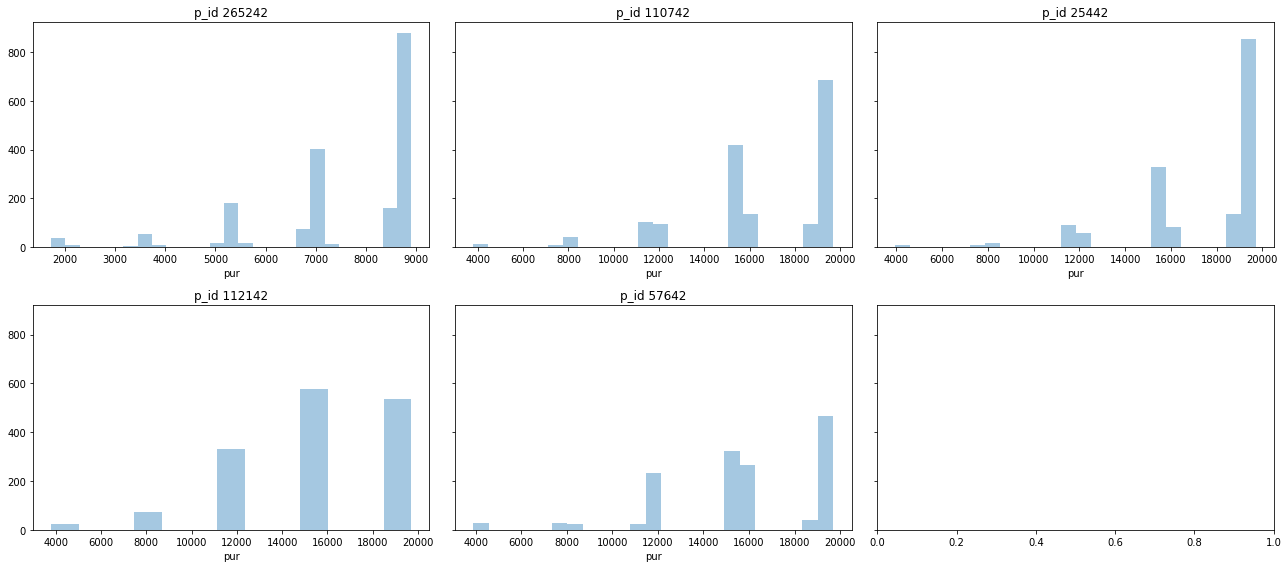

In [87]:
n_cols = 3
n_rows = len(topdfs)//n_cols + 1
fig, axs = plt.subplots(n_rows, n_cols, figsize = (18,4 * n_rows), sharey=True)
for i, df in enumerate(topdfs):
    axs[i//n_cols, i%n_cols].set_title("p_id %d" % top5[i])
    sns.distplot(df['pur'], kde = False, ax = axs[i//n_cols, i%n_cols])
plt.tight_layout()

<BarContainer object of 235 artists>

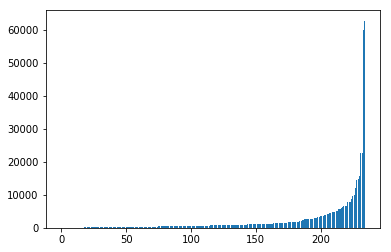

In [55]:
plt.bar(range(len(custom_clusters)), [len(x) for x in custom_clusters])

In [5]:
lower = .80
upper = 1

trimmed_modeldf = pd.concat(custom_clusters[int(len(custom_clusters) * lower) : int(len(custom_clusters) * upper - 1)])

In [6]:
trimmed_modeldf

,gender,age,occ,city,years_in_city,married,p_cat_1,p_cat_2,p_cat_3,pur
299,0,0,10,2,2,0,15,16,0,17271
354,1,2,2,1,3,0,15,16,0,12850
584,1,1,12,2,2,0,15,16,0,12790
656,0,4,3,2,1,1,15,16,0,17320
1365,0,2,4,0,0,0,15,16,0,17189
1511,1,3,16,1,0,0,15,16,0,13156
1979,1,6,13,2,1,0,15,16,0,17358
3069,1,2,12,1,0,0,15,16,0,16827
3111,1,2,0,2,4,0,15,16,0,16846
3799,1,5,2,2,2,1,15,16,0,8985


In [7]:
# splits datasets based on demographics specified
cluster_splits = ['gender', 'age', 'married']

temp = [trimmed_modeldf]
first = True
for split in cluster_splits:
    other_temp = []
    for other in temp:
        other_temp.append([other[other[split] == x] for x in range(min(other[split]), max(other[split]) + 1)])
    if first:
        temp = other_temp[0]
        first = False
    else:
        temp = []
        for other in other_temp:
            for some_other in other:
                if not some_other.empty:
                    temp.append(some_other)

custom_clusters = sorted(temp, key=len)

C:\Users\mrchr\Miniconda3\envs\tensorflow_gpuenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


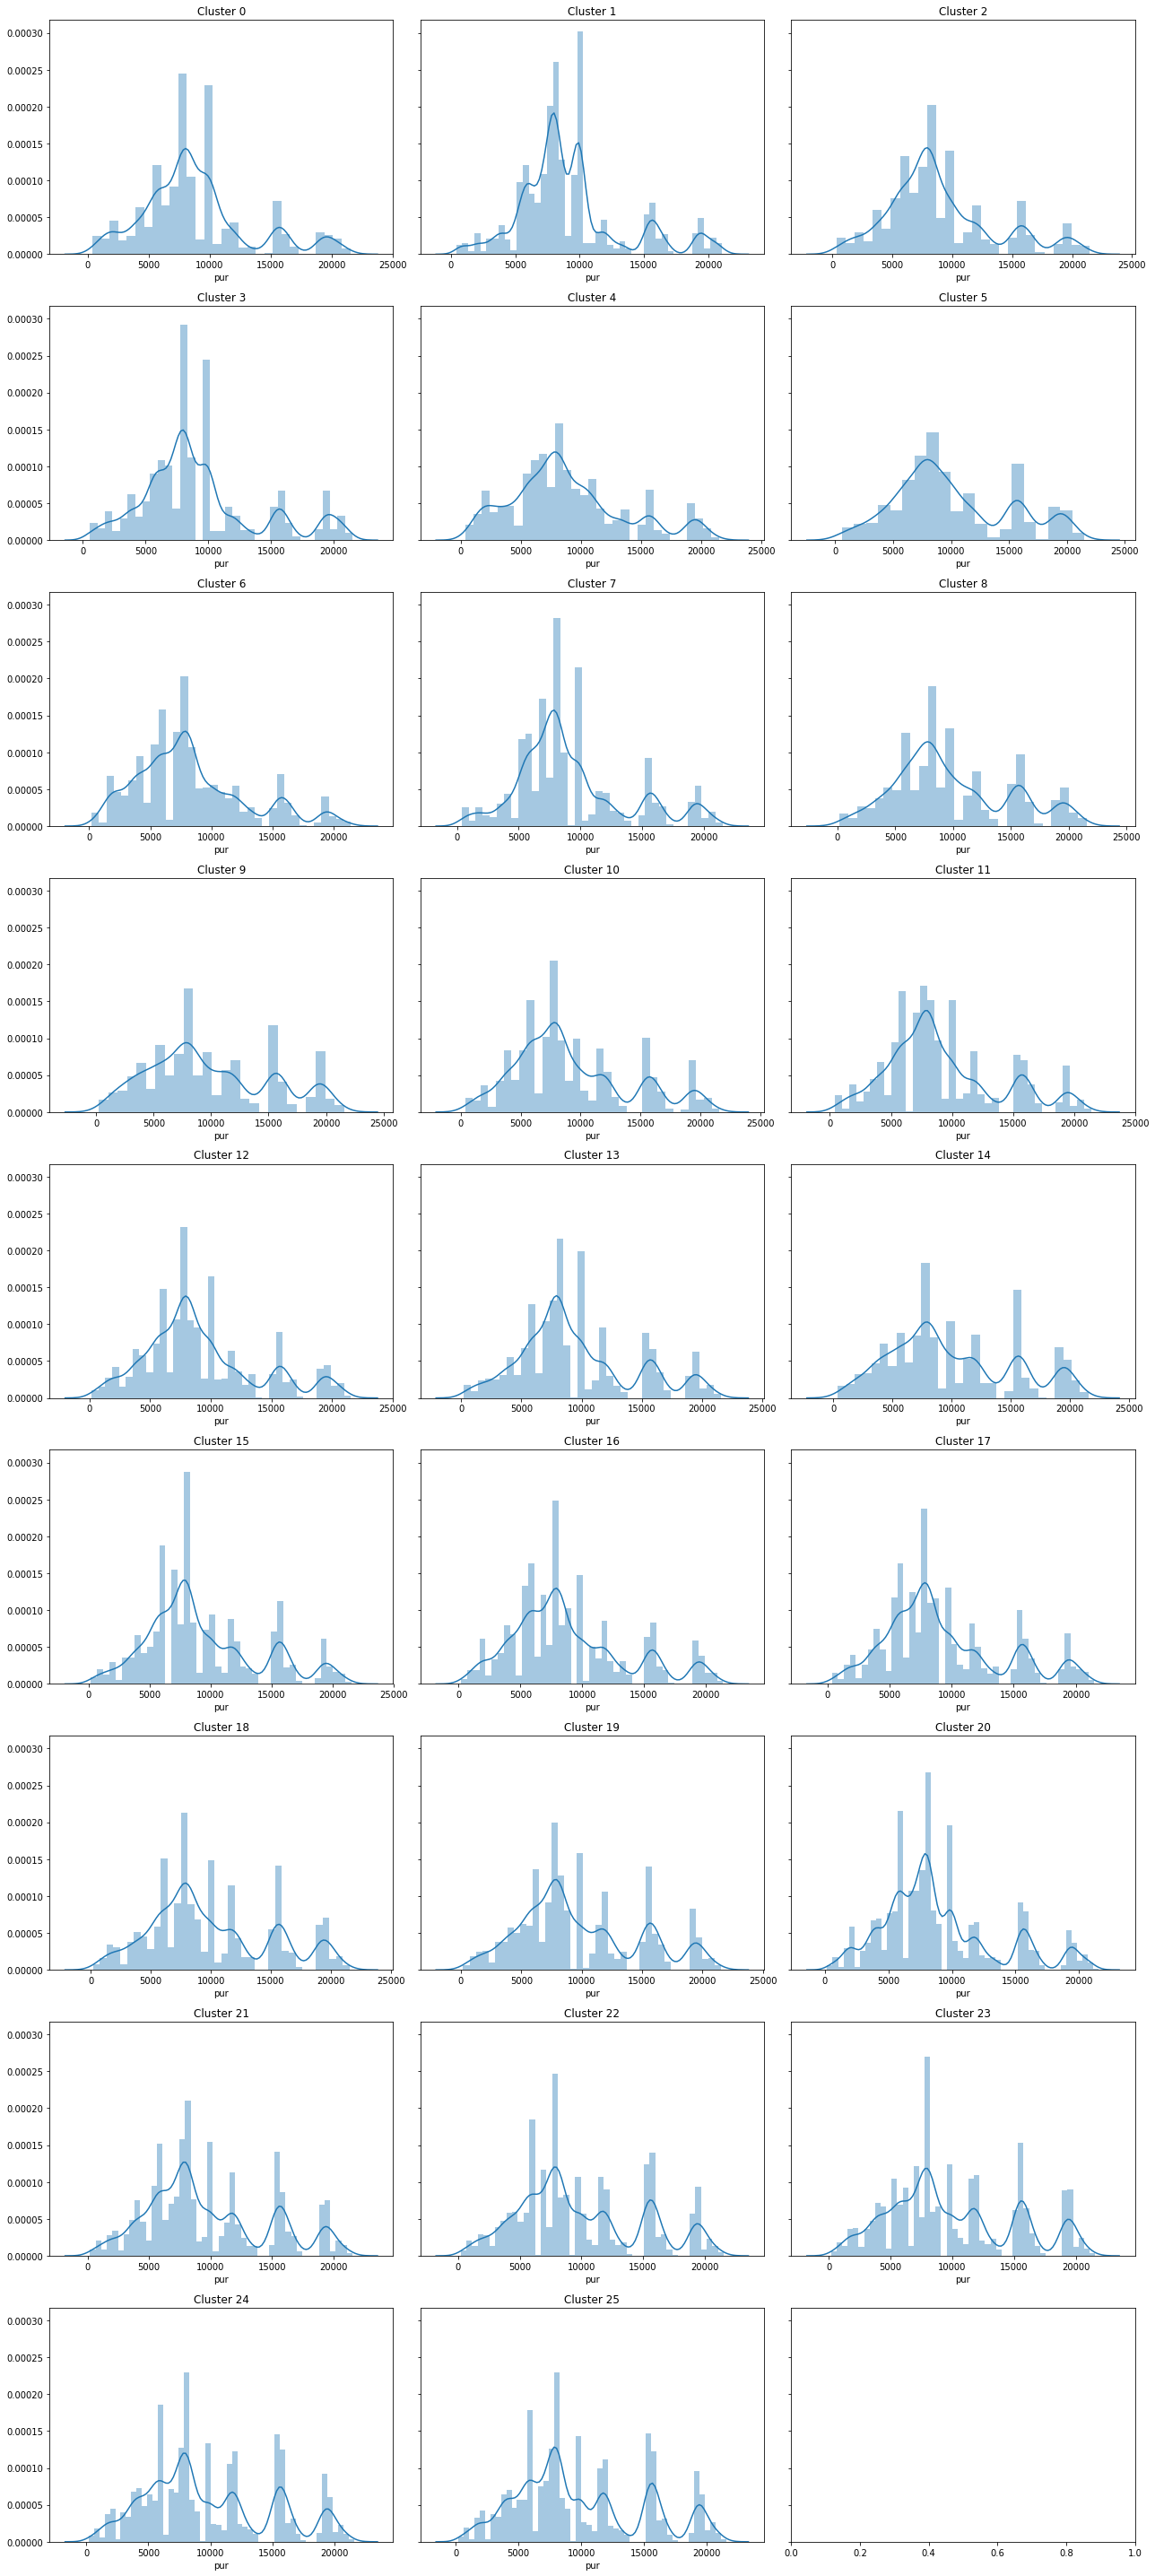

In [8]:
fig, axs = plt.subplots(len(custom_clusters)//3 + 1, 3, figsize = (18,40), sharey=True)
for i, cluster in enumerate(custom_clusters):
    axs[i//3, i%3].set_title("Cluster %d" % i)
    sns.distplot(cluster['pur'], ax = axs[i//3, i%3])
plt.tight_layout()

In [9]:
# splits datasets based on demographics specified
cluster_splits = ['gender', 'age', 'married', 'city']

temp = [modeldf]
first = True
for split in cluster_splits:
    other_temp = []
    for other in temp:
        other_temp.append([other[other[split] == x] for x in range(min(other[split]), max(other[split]) + 1)])
    if first:
        temp = other_temp[0]
        first = False
    else:
        temp = []
        for other in other_temp:
            for some_other in other:
                if not some_other.empty:
                    temp.append(some_other)

custom_clusters = sorted(temp, key=len)

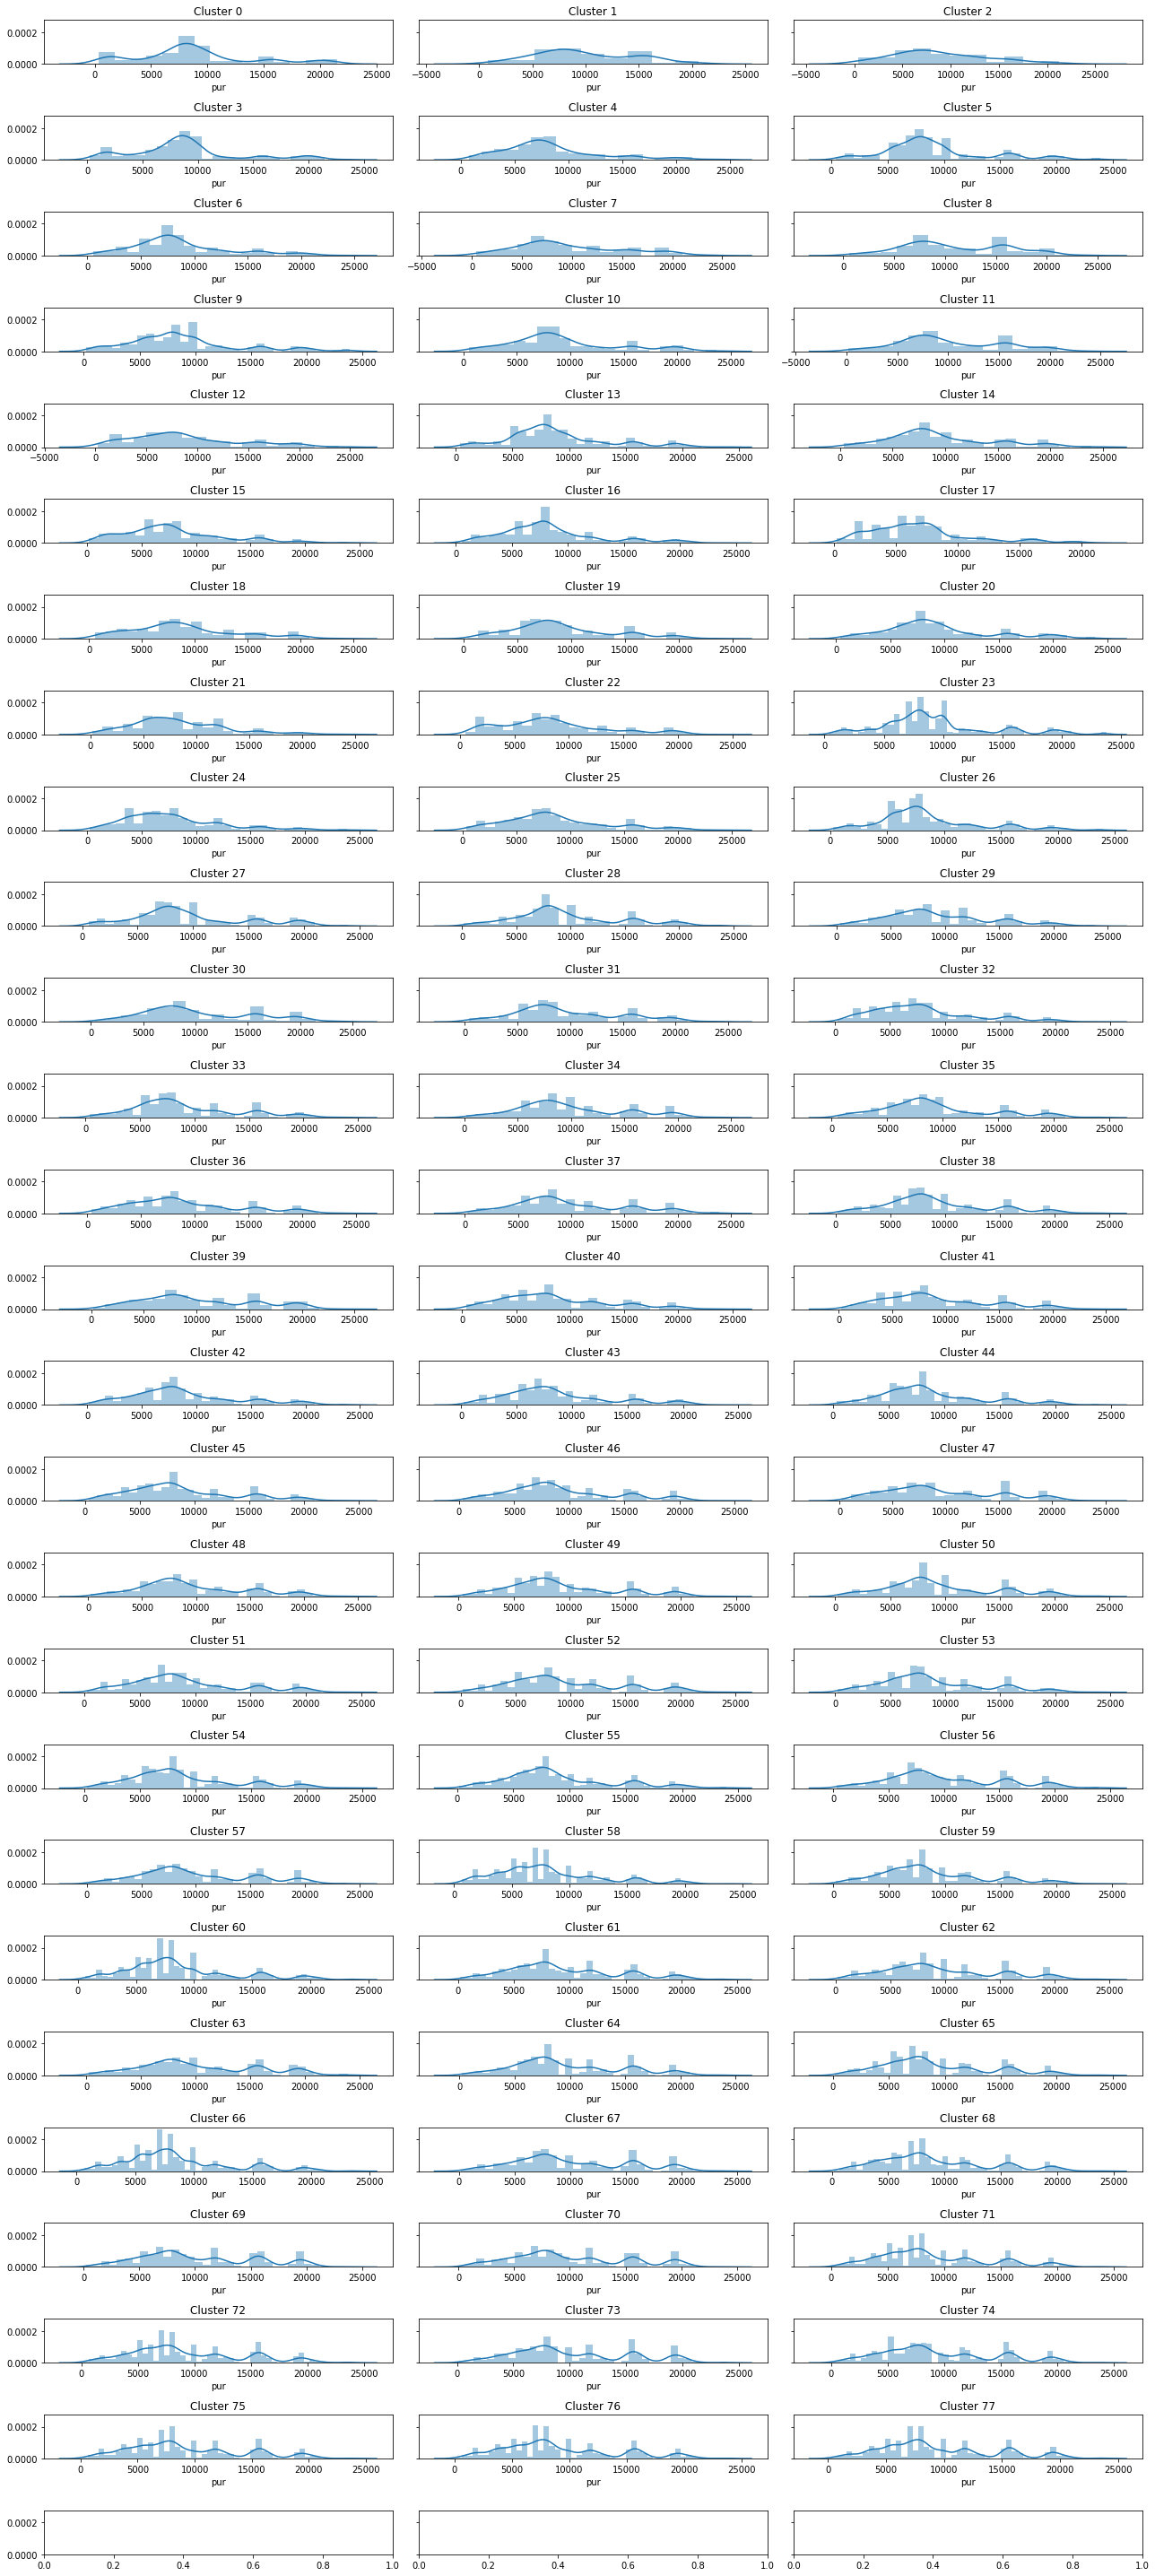

In [10]:
fig, axs = plt.subplots(len(custom_clusters)//3 + 1, 3, figsize = (18,40), sharey=True)
for i, cluster in enumerate(custom_clusters):
    axs[i//3, i%3].set_title("Cluster %d" % i)
    sns.distplot(cluster['pur'], ax = axs[i//3, i%3])
plt.tight_layout()

# Preprocessing Modeling

### Principle Componenet Analysis

In [191]:
# Generates principal component dataset

def create_pca_modeldf(X, model_cols, per_variance_captured = .95):
    
    all_X = X
    X = X[model_cols]
    pca = PCA()
    if 'p_id' in X.columns:
        X = X.drop('p_id', axis = 1)
    pca.fit(StandardScaler().fit_transform(X))
    plt.subplots(2,1, figsize=(15,5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(pca.explained_variance_ratio_, '-o')
    plt.xlabel("Principal Component")
    plt.ylabel("Pro. Variance Explained")
    ax1 = plt.subplot(1,2,2)
    plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
    plt.xlabel("Principal Component")
    plt.ylabel("Cumulative Pro. Variance Explained")
    plt.show()
    
    N3 = np.where(np.cumsum(pca.explained_variance_ratio_)>=per_variance_captured)[0][0] + 1
    print('%0.2f of variance explained by %d principal components' % (per_variance_captured, N3))

    n_components = N3
    pca = PCA(n_components = n_components)
    if 'p_id' in X.columns:
        X = X.drop('p_id', axis = 1)
    principalComponents = pca.fit_transform(StandardScaler().fit_transform(X))
    X_pca = pd.DataFrame(data = principalComponents, 
                               columns = ['pc_' + str(x) for x in range(pca.n_components_)])
    if 'p_id' in X.columns:
        X_pca = X_pca.join(X['p_id'])
    
    pca_cols = X_pca.columns
    X_pca = X_pca.join(all_X.drop(model_cols, axis = 1))
    
    return X_pca, pca_cols

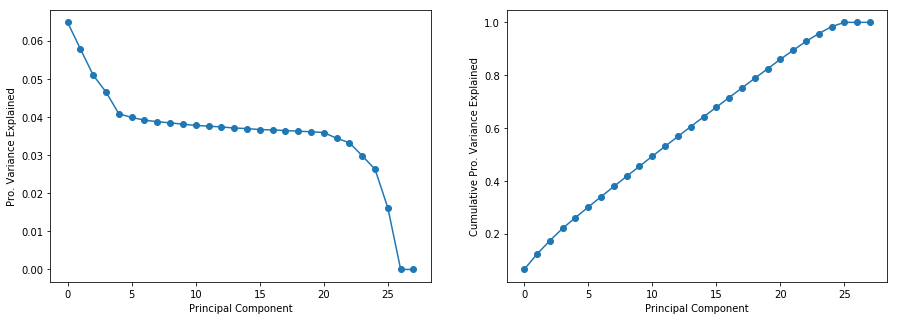

0.90 of variance explained by 23 principal components


,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,p_cat_3_15,p_cat_3_16,p_cat_3_17,p_cat_3_18,p_cat_3_3,p_cat_3_4,p_cat_3_5,p_cat_3_6,p_cat_3_8,p_cat_3_9
0,-3.320668,-1.762538,0.988307,1.951671,0.208613,0.471076,-1.288151,2.805856,0.184317,-0.869306,...,0,0,0,0,0,0,0,0,0,0
1,-3.320668,-1.762538,0.988307,1.951671,0.208613,0.471076,-1.288151,2.805856,0.184317,-0.869306,...,0,0,0,0,0,0,0,0,0,0
2,-3.320668,-1.762538,0.988307,1.951671,0.208613,0.471076,-1.288151,2.805856,0.184317,-0.869306,...,0,0,0,0,0,0,0,0,0,0
3,-3.320668,-1.762538,0.988307,1.951671,0.208613,0.471076,-1.288151,2.805856,0.184317,-0.869306,...,0,0,0,0,0,0,0,0,0,0
4,2.541531,-0.919767,0.610573,-0.790028,-0.398485,-0.129828,1.227845,-0.287828,-0.725582,-0.637972,...,0,0,0,0,0,0,0,0,0,0


In [192]:
X_pca, pca_cols = create_pca_modeldf(X, demo_cols, per_variance_captured = .9)
X_pca.head()

In [366]:
def create_fa_modeldf(X, model_cols, per_variance_captured = .95):
    
    all_X = X
    X = X[model_cols]
    X = StandardScaler().fit_transform(X)
    fa = FactorAnalysis()
    fa.fit(X)
    
    m = fa.components_
    n = fa.noise_variance_
    
    m1 = m**2
    m2 = np.sum(m1, axis = 1)
    
    pvar = (100*m2)/(np.sum(m2)+np.sum(n))
    pvar = pvar/np.cumsum(pvar)[len(pvar) - 1]
    
    plt.subplots(2,1, figsize=(15,5))
    ax1 = plt.subplot(1,2,1)
    plt.plot(pvar, '-o')
    plt.xlabel("Principal Component")
    plt.ylabel("Pro. Variance Explained")
    ax1 = plt.subplot(1,2,2)
    plt.plot(np.cumsum(pvar), '-o')
    plt.xlabel("Principal Component")
    plt.ylabel("Cumulative Pro. Variance Explained")
    plt.show()
    
    n_components = np.where(np.cumsum(pvar)>=per_variance_captured)[0][0] + 1
    print('%0.2f of variance explained by %d principal components' % (per_variance_captured, n_components))
    
    components = fa.transform(X)[:, 0:n_components]
    X_fa = pd.DataFrame(data = components, columns = ['f' + str(x) for x in range(n_components)])
    fa_cols = X_fa.columns
    X_fa = X_fa.join(all_X.drop(model_cols, axis = 1))
    
    return X_fa, fa_cols

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x000002150299EF60>>
Traceback (most recent call last):
  File "C:\Users\mrchr\Miniconda3\envs\tensorflow_gpuenv\lib\site-packages\xgboost\core.py", line 502, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
  File "C:\Users\mrchr\Miniconda3\envs\tensorflow_gpuenv\lib\site-packages\xgboost\core.py", line 165, in _check_call
    raise XGBoostError(_LIB.XGBGetLastError())
xgboost.core.XGBoostError: b'[02:28:50] C:\\Users\\Administrator\\Desktop\\xgboost\\src\\c_api\\c_api.cc:756: DMatrix/Booster has not been intialized or has already been disposed.'


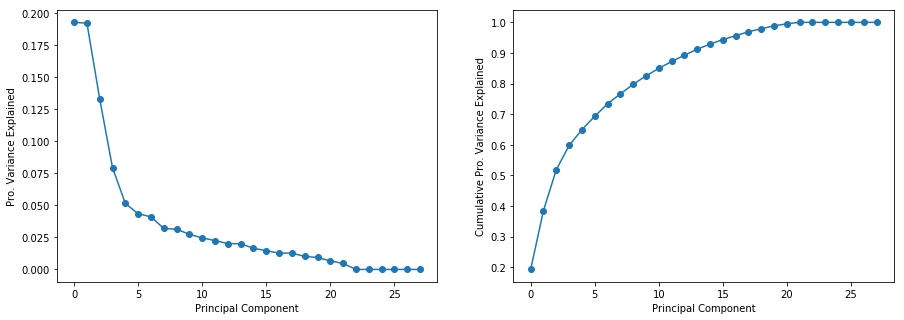

0.95 of variance explained by 17 principal components


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,p_cat_3_15,p_cat_3_16,p_cat_3_17,p_cat_3_18,p_cat_3_3,p_cat_3_4,p_cat_3_5,p_cat_3_6,p_cat_3_8,p_cat_3_9
0,-0.208597,-1.979441,0.694416,0.885650,0.772876,1.407854,-0.463428,-0.160788,-0.240930,0.525191,...,0,0,0,0,0,0,0,0,0,0
1,-0.208597,-1.979441,0.694416,0.885650,0.772876,1.407854,-0.463428,-0.160788,-0.240930,0.525191,...,0,0,0,0,0,0,0,0,0,0
2,-0.208597,-1.979441,0.694416,0.885650,0.772876,1.407854,-0.463428,-0.160788,-0.240930,0.525191,...,0,0,0,0,0,0,0,0,0,0
3,-0.208597,-1.979441,0.694416,0.885650,0.772876,1.407854,-0.463428,-0.160788,-0.240930,0.525191,...,0,0,0,0,0,0,0,0,0,0
4,1.324356,1.013547,-0.024387,-0.432656,-0.236465,-0.174523,-0.124989,-0.153652,-0.326405,0.684448,...,0,0,0,0,0,0,0,0,0,0


In [367]:
X_fa, fa_cols = create_fa_modeldf(X, demo_cols, per_variance_captured = .95)
X_fa.head()

In [143]:
def plot_3pca(X_pca, start = 0, color = 'blue'):
    start = max(start, 0)
    n_cols = 3
    n_rows = 1
    fig, axs = plt.subplots(n_rows, n_cols, figsize = (18,4 * n_rows))
    for i, num in enumerate(range(start, start + 3)):
        axes = axs[i]
        first = 'pc_%d' % num
        second = 'pc_%d' % (num+1)
        axes.scatter(X_pca[first], X_pca[second], color = color)
        axes.set_xlabel(first)
        axes.set_ylabel(second)
    plt.show()
    
    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca['pc_0'], X_pca['pc_1'],  X_pca['pc_2'], color = color)

    ax.set_xlabel("pc_0")
    ax.set_ylabel("pc_1")
    ax.set_zlabel("pc_2")
    plt.show()

In [ ]:
plot_3pca(X_pca, start = 3)

### K-means Clustering

#### Finding Optimal K

In [141]:
def run_elbow_method(X_frame, demo_cols, max_K = 10): # can change to PCA dataset
    kmeansdf = X_frame[demo_cols]
    distortions = []

    K = range(1, max_K + 1)
    for k in K:
        kmean = KMeans(n_clusters=k, n_init = 10, precompute_distances = True, n_jobs = -1).fit(kmeansdf)
        dist = sum(np.min(cdist(kmeansdf, kmean.cluster_centers_, 'euclidean'), axis=1)) / kmeansdf.shape[0]
        print("Distorition for %d clusters: %0.3f" % (k, dist))
        distortions.append(dist)

    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

Distorition for 1 clusters: 2.260
Distorition for 2 clusters: 1.975
Distorition for 3 clusters: 1.760
Distorition for 4 clusters: 1.691
Distorition for 5 clusters: 1.635
Distorition for 6 clusters: 1.600
Distorition for 7 clusters: 1.564
Distorition for 8 clusters: 1.518
Distorition for 9 clusters: 1.489
Distorition for 10 clusters: 1.473


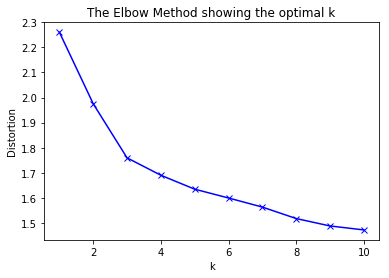

In [142]:
### DON'T RUN UNLESS YOU WANT TO FIND OPTIMAL K FOR K MEANS ###
### TAKES A LONG TIME TO RUN ###

# Model dataframe elbow method
run_elbow_method(X, demo_cols)

Distorition for 1 clusters: 6.183
Distorition for 2 clusters: 6.051
Distorition for 3 clusters: 5.912
Distorition for 4 clusters: 5.836
Distorition for 5 clusters: 5.762
Distorition for 6 clusters: 5.656
Distorition for 7 clusters: 5.592
Distorition for 8 clusters: 5.424
Distorition for 9 clusters: 5.353
Distorition for 10 clusters: 5.279


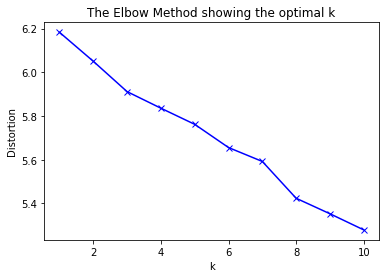

In [169]:
### DON'T RUN UNLESS YOU WANT TO FIND OPTIMAL K FOR K MEANS ###
### TAKES A LONG TIME TO RUN ###

#PCA elbow method
run_elbow_method(X_pca, pca_cols)

#### Clustering Dataset

In [349]:
# Generates k-means cluster datasets
# returns whole dataframe with clusters and cluster split dataframes
def create_cluster_modeldfs(X, y, demo_cols, n_clusters = 3, drop_demo = True):
    kmeansdf = X[demo_cols]
    
    kmeans = KMeans(n_clusters = n_clusters, random_state = 42, n_init = 20, precompute_distances = True, n_jobs = -1).fit(kmeansdf) # testing shows that 2-3 clussters works the best
    cluster_nums = kmeans.predict(kmeansdf)

    # Single dataset for clusters
    X_cluster = pd.DataFrame(cluster_nums, columns = ['cluster_num'])
    if drop_demo:
        X_cluster = X_cluster.join(X.drop(demo_cols, axis = 1))
    else:
        X_cluster = X_cluster.join(X)
        
    
    # Seperate datasets based on clusters
    temp = X_cluster.join(y)
    X_clusters = [temp[temp['cluster_num'] == x] for x in range(max(temp['cluster_num']) + 1)]
    X_clusters = [cluster.drop('cluster_num', axis = 1) for cluster in X_clusters]
    
    return X_cluster, X_clusters

In [260]:
try:
    print("Clustering\n")
    X_cluster, X_clusters = create_cluster_modeldfs(X, y, demo_cols, n_clusters = 3)
    print("Done!")
except:
    print ("Create model dataframe first!")

Clustering



In [270]:
try:
    print("Clustering Using PCAs\n")
    X_pca_cluster, X_pca_clusters = create_cluster_modeldfs(X_pca, y, pca_cols, n_clusters = 3, drop_demo = True)
    print("Done!")
except:
    print ("Create model dataframe first!")

Clustering Using PCAs



In [368]:
try:
    print("Clustering Using FA\n")
    X_fa_cluster, X_fa_clusters = create_cluster_modeldfs(X_fa, y, fa_cols, n_clusters = 3, drop_demo = True)
    print("Done!")
except:
    print ("Create model dataframe first!")

Clustering Using FA

Done!


In [258]:
plot_n_clusters = 3
_, plot_cluster_pcas = create_cluster_modeldfs(X_pca, y, pca_cols, isPCA = True, drop_demo = False, n_clusters = plot_n_clusters)

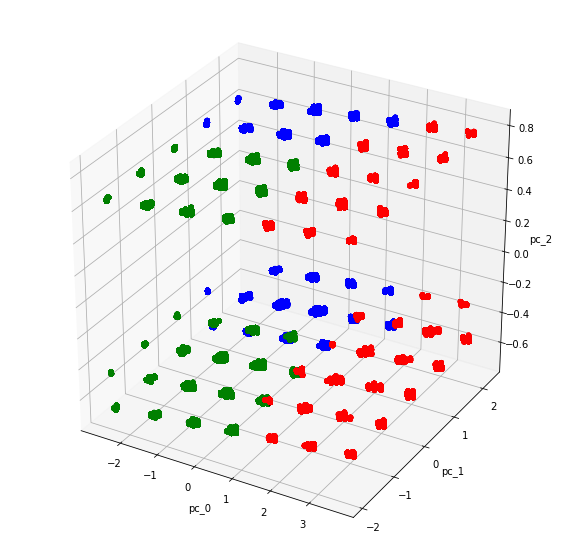

In [60]:
colors = ['green', 'blue', 'red']
labels = ['cluster 0', 'cluster 1', 'cluster 2']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

for pca_cluster, color, label in zip(plot_cluster_pcas, colors, labels):
    ax.scatter(pca_cluster['pc_0'], pca_cluster['pc_1'],  pca_cluster['pc_2'], color = color, label = label)
    
ax.set_xlabel("pc_0")
ax.set_ylabel("pc_1")
ax.set_zlabel("pc_2")
plt.show()

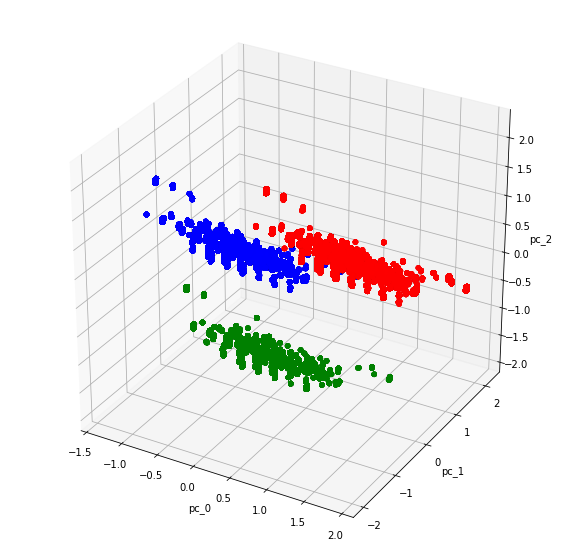

In [259]:
colors = ['green', 'blue', 'red', 'yellow', 'black']
labels = ['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3', 'cluster 4']

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')

for pca_cluster, color, label in zip(plot_cluster_pcas, colors, labels):
    ax.scatter(pca_cluster['pc_0'], pca_cluster['pc_1'],  pca_cluster['pc_2'], color = color, label = label)
    
ax.set_xlabel("pc_0")
ax.set_ylabel("pc_1")
ax.set_zlabel("pc_2")
plt.show()

# Predictive Modeling 

### Creating Modeling Datasets

In [132]:
# Train and testing data for model dataset
def split_model_data(X, y = y, scale = False): # can specify different
    if scale:
        X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state=30)

    y_train = np.array(y_train).T.reshape(1, -1)[0]
    y_test = np.array(y_test).T.reshape(1, -1)[0]
    return X_train, X_test, y_train, y_test
def create_dataframe_split(X_data, y_data, scale = False):
    try:
        data_splits = (split_model_data(X_data, y_data, scale = scale))
        print("Dataframe shape:", data_splits[0].shape, data_splits[1].shape, data_splits[2].shape, data_splits[3].shape)      
        return data_splits[0], data_splits[1], data_splits[2], data_splits[3]
    except:
        print ("Create model dataframe first!")
        return [], [], [], []
def create_cluster_dataframe_split(clusters):
    try:
        X_cl_trains = []
        X_cl_tests = [] 
        y_cl_trains = []
        y_cl_tests = []
        for i, clusterdf in enumerate(clusters):
            X_frame = clusterdf.drop(predictor, axis = 1)
            y_frame = clusterdf[predictor]
            X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(X_frame, y_frame, test_size = 0.25, random_state=30)
            y_cl_train = np.array(y_cl_train).T.reshape(1, -1)[0]
            y_cl_test = np.array(y_cl_test).T.reshape(1, -1)[0]
            X_cl_trains.append(X_cl_train)
            X_cl_tests.append(X_cl_test)
            y_cl_trains.append(y_cl_train)
            y_cl_tests.append(y_cl_test)
            print("Cluster num", i, ":" , X_cl_trains[i].shape, X_cl_tests[i].shape, y_cl_trains[i].shape, y_cl_tests[i].shape)
        return X_cl_trains, X_cl_tests, y_cl_trains, y_cl_tests
    except:
        print ("Create model dataframe first!")
        print("")
        return [], [], [], []
    

In [271]:
try:
    print("Model Dataset")
    X_train, X_test, y_train, y_test = create_dataframe_split(X, y)

    print("\nModel Dataset Scaled")
    X_s_train, X_s_test, y_s_train, y_s_test = create_dataframe_split(X, y, True)
except:
    print ("Create model dataframe first!")

try:    
    print("\nPCA Dataset")
    X_pca_train, X_pca_test, y_pca_train, y_pca_test = create_dataframe_split(X_pca, y)
except:
    print ("Create model dataframe first!")

try:
    print("\nCluster Dataset")
    X_cl_train, X_cl_test, y_cl_train, y_cl_test = create_dataframe_split(X_cluster, y)

    print("\nCluster Dataset Scaled")
    X_s_cl_train, X_s_cl_test, y_s_cl_train, y_s_cl_test = create_dataframe_split(X_cluster, y, True)
except:
    print ("Create model dataframe first!")

try:
    print("\nPCA Cluster Dataset")
    X_pca_cl_train, X_pca_cl_test, y_pca_cl_train, y_pca_cl_test = create_dataframe_split(X_pca_cluster, y) 
except:
    print ("Create model dataframe first!")
    
try:    
    print("\nSplit Cluster Dataset")
    X_cl_trains, X_cl_tests, y_cl_trains, y_cl_tests = create_cluster_dataframe_split(X_clusters)
except:
    print ("Create model dataframe first!")

try:    
    print("\nSplit PCA Cluster Dataset")
    X_pca_cl_trains, X_pca_cl_tests, y_pca_cl_trains, y_pca_cl_tests = create_cluster_dataframe_split(X_pca_clusters)
except:
    print ("Create model dataframe first!")

Model Dataset
Dataframe shape: (403182, 80) (134395, 80) (403182,) (134395,)

Model Dataset Scaled
Dataframe shape: (403182, 80) (134395, 80) (403182,) (134395,)

PCA Dataset
Dataframe shape: (403182, 69) (134395, 69) (403182,) (134395,)

PCA Dataset Scaled
Dataframe shape: (403182, 69) (134395, 69) (403182,) (134395,)

Cluster Dataset
Dataframe shape: (403182, 53) (134395, 53) (403182,) (134395,)

Cluster Dataset Scaled
Dataframe shape: (403182, 53) (134395, 53) (403182,) (134395,)

PCA Cluster Dataset
Dataframe shape: (403182, 70) (134395, 70) (403182,) (134395,)

PCA Cluster Dataset Scaled
Dataframe shape: (403182, 70) (134395, 70) (403182,) (134395,)

Split Cluster Dataset
Cluster num 0 : (216855, 52) (72285, 52) (216855,) (72285,)
Cluster num 1 : (114307, 52) (38103, 52) (114307,) (38103,)
Cluster num 2 : (72020, 52) (24007, 52) (72020,) (24007,)

Split PCA Cluster Dataset
Cluster num 0 : (108478, 69) (36160, 69) (108478,) (36160,)
Cluster num 1 : (169869, 69) (56624, 69) (169869,

In [369]:
try:    
    print("\nFA Dataset")
    X_fa_train, X_fa_test, y_fa_train, y_fa_test = create_dataframe_split(X_fa, y)
except:
    print ("Create model dataframe first!")


FA Dataset
Dataframe shape: (403182, 69) (134395, 69) (403182,) (134395,)


### Linear Regression

In [134]:
from sklearn.metrics import r2_score
def linear_reg_data(X_tr, y_tr, X_te, y_te):
    reg = LinearRegression().fit(X_tr, y_tr)
    pred = reg.predict(X_te)
    print("MAE for test set: ", mean_absolute_error(pred, y_te))
    print("R^2 Score: ", r2_score(pred, y_te))

In [272]:
try:
    print("Model Dataset")
    linear_reg_data(X_train, y_train, X_test, y_test)

    print("\nModel Dataset Scaled")
    linear_reg_data(X_s_train, y_s_train, X_s_test, y_s_test)
except:
    print ("Create model dataframe first!")

try:    
    print("\nPCA Dataset")
    linear_reg_data(X_pca_train, y_pca_train, X_pca_test, y_pca_test)
except:
    print ("Create model dataframe first!")

try:
    print("\nCluster Dataset")
    linear_reg_data(X_cl_train, y_cl_train, X_cl_test, y_cl_test)

    print("\nCluster Dataset Scaled")
    linear_reg_data(X_s_cl_train, y_s_cl_train, X_s_cl_test, y_s_cl_test)
except:
    print ("Create model dataframe first!")

try:    
    print("\nPCA Cluster Dataset")
    linear_reg_data(X_pca_cl_train, y_pca_cl_train, X_pca_cl_test, y_pca_cl_test)
except:
    print ("Create model dataframe first!")
    
try:
    print("\nSplit Cluster Dataset\n-------------")
    for i, X_cl_tr, X_cl_te, y_cl_tr, y_cl_te in zip(range(len(X_cl_trains)), X_cl_trains, X_cl_tests, y_cl_trains, y_cl_tests):
        print("Cluster num:", i)
        linear_reg_data(X_cl_tr, y_cl_tr, X_cl_te, y_cl_te)
        print("")
except:
    print ("Create model dataframe first!")
    
try:
    print("\nSplit PCA Cluster Dataset\n-------------")
    for i, X_cl_tr, X_cl_te, y_cl_tr, y_cl_te in zip(range(len(X_pca_cl_trains)), X_pca_cl_trains, X_pca_cl_tests, y_pca_cl_trains, y_pca_cl_tests):
        print("Cluster num:", i)
        linear_reg_data(X_cl_tr, y_cl_tr, X_cl_te, y_cl_te)
        print("")
except:
    print ("Create model dataframe first!")

Model Dataset
MAE for test set:  2262.835475417612
R^2 Score:  0.43620386396762423

Model Dataset Scaled
MAE for test set:  2262.737508045939
R^2 Score:  0.43623592398322364

PCA Dataset
MAE for test set:  2264.3159697161354
R^2 Score:  0.4354078427685206

PCA Dataset Scaled
MAE for test set:  2264.670743505685
R^2 Score:  0.4359265787064217

Cluster Dataset
MAE for test set:  2274.2234978979873
R^2 Score:  0.42927499588817497

Cluster Dataset Scaled
MAE for test set:  2275.1480365113616
R^2 Score:  0.4300236839654932

PCA Cluster Dataset
MAE for test set:  2264.298735071989
R^2 Score:  0.4354048222658854

PCA Cluster Dataset Scaled
MAE for test set:  2264.221267042903
R^2 Score:  0.4352471491190679

Split Cluster Dataset
-------------
Cluster num: 0
MAE for test set:  2318.5572698346823
R^2 Score:  0.4021986788016161

Cluster num: 1
MAE for test set:  2305.5793507072935
R^2 Score:  0.40815923502629126

Cluster num: 2
MAE for test set:  2098.2952055650435
R^2 Score:  0.535842431468913


### MLP Regression

In [53]:
from sklearn.metrics import r2_score

def MLP_data(X_tr, y_tr, X_te, y_te, verbose = False, show_plot = False):  
    mlp = MLPRegressor(activation = 'identity',
                   hidden_layer_sizes = (25, 1),
                   solver = 'adam',
                   learning_rate = 'constant',
                   random_state = 42,
                   batch_size = 3000,
                   verbose = verbose,
                   learning_rate_init = 1).fit(X_tr, y_tr)
    pred = mlp.predict(X_te)
    print("MAE for test set: ", mean_absolute_error(pred, y_te))
    print("R^2 Score: ", r2_score(pred, y_te))
    if show_plot:
        plt.plot(np.sqrt(mlp.loss_curve_))
        plt.xlabel("epoch")
        plt.ylabel("MAE")
        plt.show()
    return mlp

In [248]:
print("Model Dataset")
_ = MLP_data(X_train, y_train, X_test, y_test)

print("\nModel Dataset Scaled")
_ = MLP_data(X_s_train, y_s_train, X_s_test, y_s_test)

print("\nPCA Dataset")
_ = MLP_data(X_pca_train, y_pca_train, X_pca_test, y_pca_test)

print("\nCluster Dataset")
_ = MLP_data(X_cl_train, y_cl_train, X_cl_test, y_cl_test)

print("\nCluster Dataset Scaled")
_ = MLP_data(X_s_cl_train, y_s_cl_train, X_s_cl_test, y_s_cl_test)

print("\nPCA Cluster Dataset")
_ = MLP_data(X_pca_cl_train, y_pca_cl_train, X_pca_cl_test, y_pca_cl_test)

Model Dataset
MAE for test set:  2246.6227078802553
R^2 Score:  0.4680090118188297

Model Dataset Scaled
MAE for test set:  2305.997183883022
R^2 Score:  0.36911721395727404

PCA Dataset
MAE for test set:  2250.752578808723
R^2 Score:  0.4489139279147861

PCA Dataset Scaled
MAE for test set:  2269.9669878049467
R^2 Score:  0.4453597720107977

Cluster Dataset
MAE for test set:  2289.725114721035
R^2 Score:  0.42522401116507613

Cluster Dataset Scaled
MAE for test set:  2318.726456302134
R^2 Score:  0.39293505458251243

PCA Cluster Dataset
MAE for test set:  2300.2192784239473
R^2 Score:  0.39989843190626073

PCA Cluster Dataset Scaled
MAE for test set:  2322.5055826978546
R^2 Score:  0.39332398534115043


In [197]:
print("Cluster Dataset\n-------------")

for i, X_cl_tr, X_cl_te, y_cl_tr, y_cl_te in zip(range(len(X_cl_trains)), X_cl_trains, X_cl_tests, y_cl_trains, y_cl_tests):
    print("\nCluster num:", i)
    _ = MLP_data(X_cl_tr, y_cl_tr, X_cl_te, y_cl_te, verbose = False)

Cluster Dataset
-------------

Cluster num: 0
MAE for test set:  2105.464909692193
R^2 Score:  0.5399721676718922

Cluster num: 1
MAE for test set:  2380.116328418239
R^2 Score:  0.3200847817661092

Cluster num: 2
MAE for test set:  2278.61532767077
R^2 Score:  0.44089838299315

Cluster num: 3
MAE for test set:  2370.978517783259
R^2 Score:  0.3838266467641501

Cluster num: 4
MAE for test set:  2093.4737620300816
R^2 Score:  0.5477709886255264


In [198]:
print("PCA Cluster Dataset\n-------------")

for i, X_cl_tr, X_cl_te, y_cl_tr, y_cl_te in zip(range(len(X_pca_cl_trains)), X_pca_cl_trains, X_pca_cl_tests, y_pca_cl_trains, y_pca_cl_tests):
    print("\nCluster num:", i)
    _ = MLP_data(X_cl_tr, y_cl_tr, X_cl_te, y_cl_te, verbose = False)

PCA Cluster Dataset
-------------

Cluster num: 0
MAE for test set:  2223.5921945277764
R^2 Score:  0.4892180709535029

Cluster num: 1
MAE for test set:  2310.8565543906066
R^2 Score:  0.3749274795843548

Cluster num: 2
MAE for test set:  2152.2576940130825
R^2 Score:  0.532104553122935

Cluster num: 3
MAE for test set:  2278.816948387211
R^2 Score:  0.4179390176260537

Cluster num: 4
MAE for test set:  2364.179459258909
R^2 Score:  0.3897867445955555


### Gradient Boost Regressor

In [279]:
learning_rates = [1.5]
for learning_rate in learning_rates:
    gb = GradientBoostingRegressor(learning_rate = learning_rate, random_state = 42, max_leaf_nodes = 300, verbose = 2).fit(X_pca_train, y_pca_train)
    pred = gb.predict(X_pca_test)
    print("MAE: ", mean_absolute_error(pred, y_pca_test))
    print("R^2 Score: ", r2_score(pred, y_pca_test))

      Iter       Train Loss   Remaining Time 
         1    16221645.0535            4.78m
         2    13065914.7181            4.55m
         3    10602313.8467            4.44m
         4     9715728.7413            4.16m
         5     9419597.2898            4.02m
         6     9261543.8304            3.91m
         7     9128276.0273            3.87m
         8     9053171.4313            3.78m
         9     8997516.7107            3.73m
        10     8950024.7879            3.64m
        11     8905513.6901            3.66m
        12     8881135.2198            3.67m
        13     8852741.0655            3.64m
        14     8822221.0665            3.64m
        15     8804191.9498            3.58m
        16     8774665.4730            3.63m
        17     8756341.4232            3.58m
        18     8740436.5772            3.50m
        19     8714358.7594            3.46m
        20     8696167.5447            3.42m
        21     8655346.9308            3.37m
        2

### XGBoost Regression

In [352]:
def xgboost_data(X_tr, y_tr, X_te, y_te):
    param = {
        'booster': 'dart',
        'eta': .75,  # the training step for each iteration
        'silent': 1,  # logging mode - quiet
        'grow_policy' : 'depthwise',
        'tree_method' : 'hist',
        'eval_metric': 'rmse',
        'max_depth' : 10,
        'rate_drop': 0.1,
        'skip_drop': 0.5,
        'seed': 42}
    num_round = 30  # the number of training iterations
    
    dtrain = xgb.DMatrix(X_tr, label=y_tr)
    dtest = xgb.DMatrix(X_te, label=y_te)

    bst = xgb.train(param, dtrain, num_round)
    pred = bst.predict(dtest, ntree_limit=num_round)
    print("MAE: ", mean_absolute_error(pred, y_te))
    print("R^2 Score: ", r2_score(pred, y_te))
    return bst

In [353]:
print("Model Dataset")
_ = xgboost_data(X_train, y_train, X_test, y_test)

print("\nModel Dataset Scaled")
_ = xgboost_data(X_s_train, y_s_train, X_s_test, y_s_test)

print("\nPCA Dataset")
_ = xgboost_data(X_pca_train, y_pca_train, X_pca_test, y_pca_test)

print("\nCluster Dataset")
_ = xgboost_data(X_cl_train, y_cl_train, X_cl_test, y_cl_test)

print("\nCluster Dataset Scaled")
_ = xgboost_data(X_s_cl_train, y_s_cl_train, X_s_cl_test, y_s_cl_test)

print("\nPCA Cluster Dataset")
_ = xgboost_data(X_pca_cl_train, y_pca_cl_train, X_pca_cl_test, y_pca_cl_test)

Model Dataset
[02:06:51] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE:  2152.5959621798224
R^2 Score:  0.49758330007566787

Model Dataset Scaled
[02:07:04] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE:  2152.5959621798224
R^2 Score:  0.49758330007566787

PCA Dataset
[02:07:26] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE:  2135.425510224956
R^2 Score:  0.5078670424360295

Cluster Dataset
[02:07:50] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE:  2217.433912586993
R^2 Score:  0.46164475528422977

Cluster Dataset Scaled
[02:08:07] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE:  2217.433912586993
R^2 Score:  0.46164475528422977

PCA Cluster Dataset
[02:08:24] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE:  2142.979032618

In [370]:
print("\nFA Dataset")
bst = xgboost_dart_data(X_fa_train, y_fa_train, X_fa_test, y_fa_test)


FA Dataset
[02:30:11] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE:  2135.425510224956
R^2 Score:  0.5078670424360295


In [374]:
bst.save_model('inputs/xgb_black_friday_model.bin')

In [384]:
dmodel = xgb.DMatrix(X_fa, label=y).save_binary('inputs/xgb_modeldf.buffer')
with ZipFile('inputs/xgb_modeldf.zip', 'w', zipfile.ZIP_DEFLATED) as myzip:
    myzip.write('inputs/xgb_modeldf.buffer')

In [ ]:
def xgboost_cluster_data(X_cl_trs, X_cl_tes, y_cl_trs, y_cl_tes):
    param = {
        'booster': 'dart',
        'eta': .75,  # the training step for each iteration
        'silent': 1,  # logging mode - quiet
        'grow_policy' : 'depthwise',
        'tree_method' : 'hist',
        'eval_metric': 'rmse',
        'max_depth' : 10,
        'rate_drop': 0.1,
        'skip_drop': 0.5,
        'seed': 42}
    bsts = []
    num_round = 30  # the number of training iterations
    mean_mae = 0

    for i, X_cl_tr, X_cl_te, y_cl_tr, y_cl_te in zip(range(len(X_cl_trs)), X_cl_trs, X_cl_tes, y_cl_trs, y_cl_tes):
        dtrain = xgb.DMatrix(X_cl_tr, label=y_cl_tr)
        dtest = xgb.DMatrix(X_cl_te, label=y_cl_te)

        bst = xgb.train(param, dtrain, num_round)
        pred = bst.predict(dtest)
        temp_mae = mean_absolute_error(pred, y_cl_te)
        mean_mae = mean_mae + temp_mae
        
        print("MAE for cluster", i, ":", temp_mae)
        print("R^2 Score for Cluster: ", r2_score(pred, y_cl_te))
        print("")
        bsts.append(bst)
    print("\nAverage MAE for all clusters:", mean_mae/len(X_cl_trs))
    return bsts

In [ ]:
bsts = xgboost_cluster_data(X_cl_trains, X_cl_tests, y_cl_trains, y_cl_tests)

In [ ]:
bsts = xgboost_cluster_data(X_pca_cl_trains, X_pca_cl_tests, y_pca_cl_trains, y_pca_cl_tests)

[11:00:43] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE:  2152.5959621798224
R^2 Score:  0.49758330007566787


ValueError: Feature importance is not defined for Booster type dart

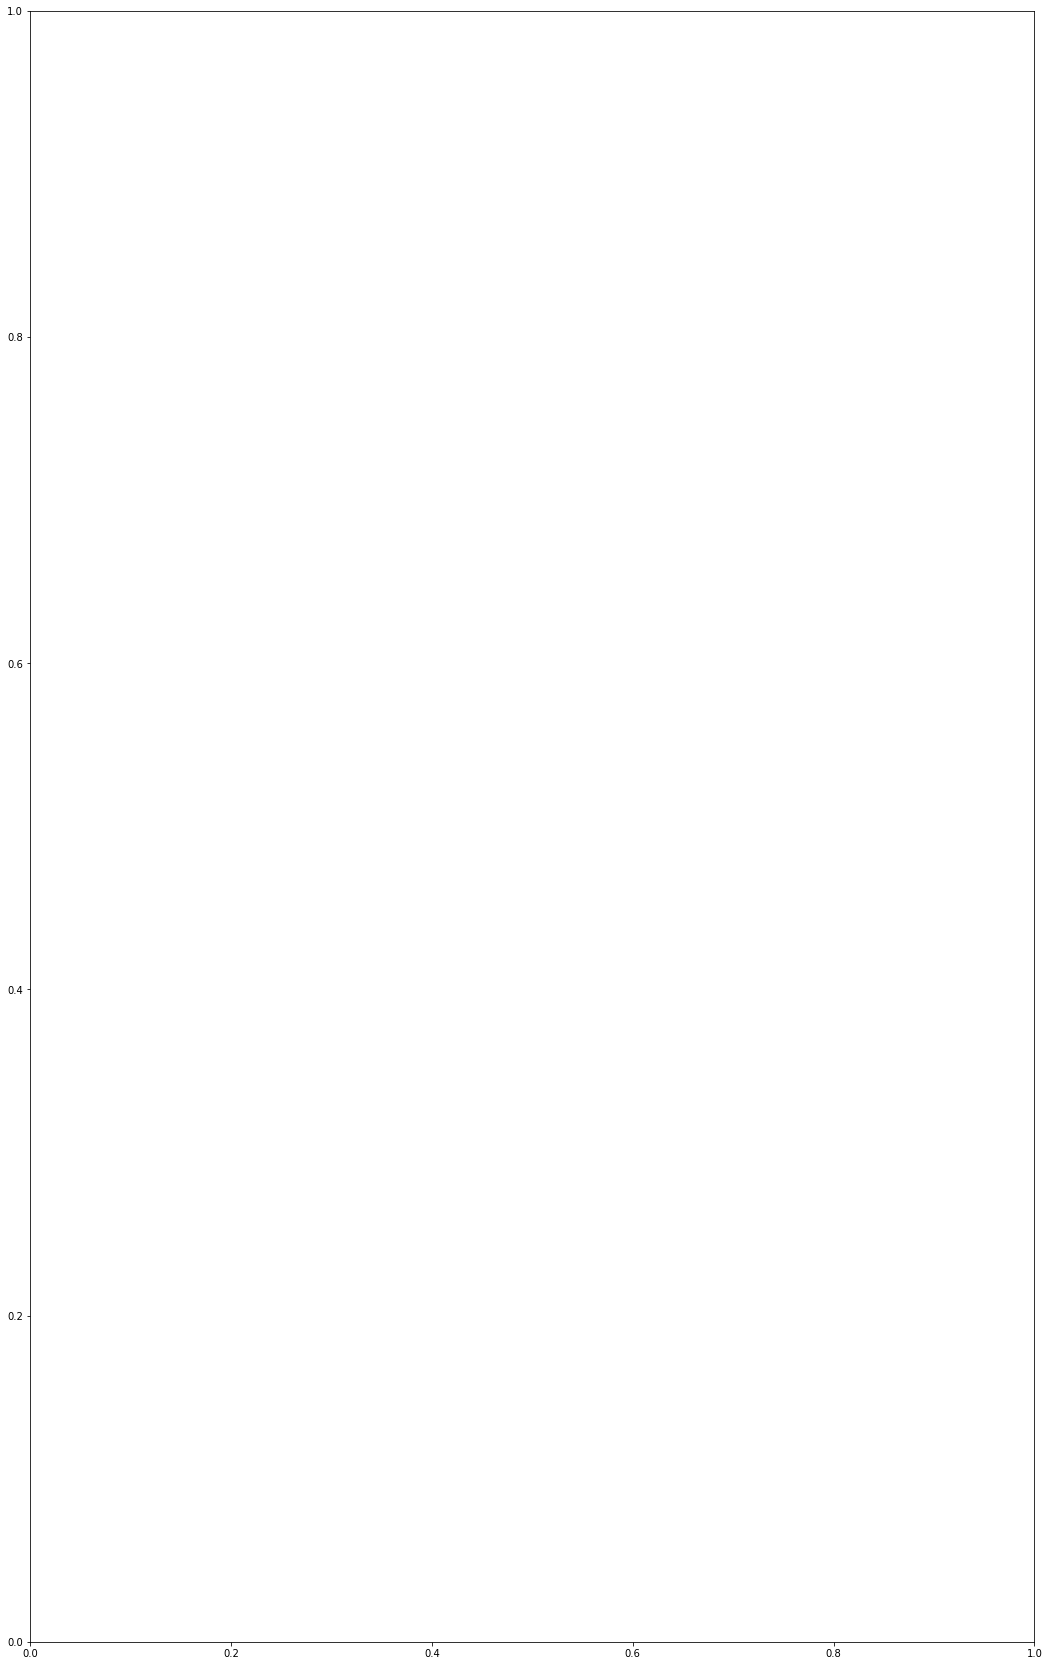

In [338]:
fig, axes = plt.subplots(1, 1, figsize = (18,30))
bst = xgboost_data(X_train, y_train, X_test, y_test)
xgb.plot_importance(bst, ax = axes, grid = False)

In [282]:
def plot_residuals(bst, X_tr, y_tr):
    dtrain = xgb.DMatrix(X_tr, label=y_tr)
    
    predictions_train = bst.predict(dtrain)
    residuals = y_tr - predictions_train

    fig = plt.figure(figsize=(12,4))

    ax1 = fig.add_subplot(121)
    ax1.scatter(predictions_train, residuals)
    ax1.set_xlabel("Predicted")
    ax1.set_ylabel("Residual")

    ax2 = fig.add_subplot(122)
    ax2.hist(residuals)
    ax2.set_xlabel("Residual")
    ax2.set_ylabel("Frequency")

[01:08:41] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE:  2152.1324922834347


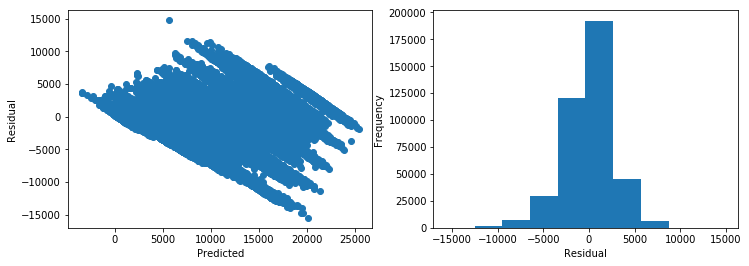

In [120]:
bst = xgboost_data(X_s_pca_train, y_s_pca_train, X_s_pca_test, y_s_pca_test)
plot_residuals(bst, X_s_pca_train, y_s_pca_train)

[11:02:24] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE:  2135.425510224956
R^2 Score:  0.5078670424360295


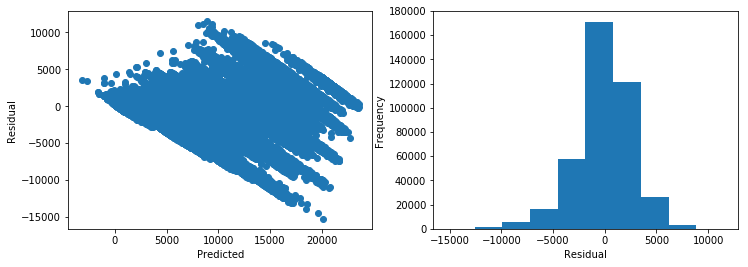

In [340]:
bst = xgboost_data(X_pca_train, y_pca_train, X_pca_test, y_pca_test)
plot_residuals(bst, X_pca_train, y_pca_train)

[01:08:53] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE for cluster 0 : 2257.26426518299

[01:08:55] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE for cluster 1 : 2247.909637314214

[01:08:57] Tree method is selected to be 'hist', which uses a single updater grow_fast_histmaker.
MAE for cluster 2 : 2040.1149226474797


Average MAE for all clusters: 2181.7629417148946


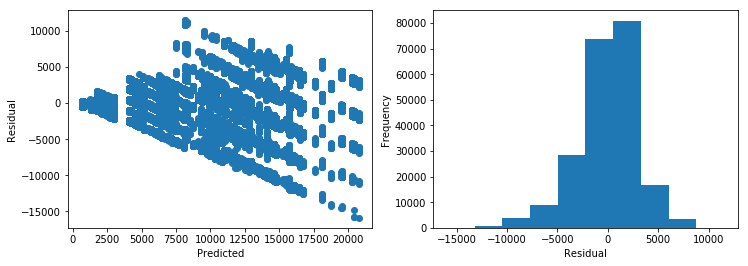

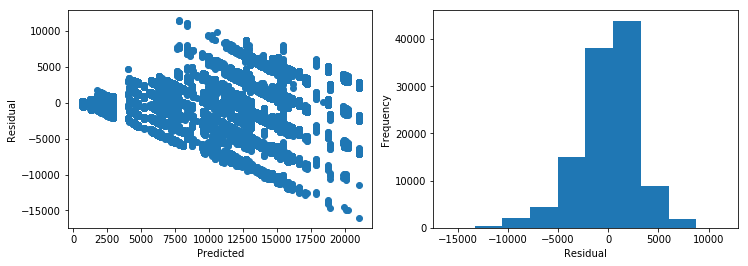

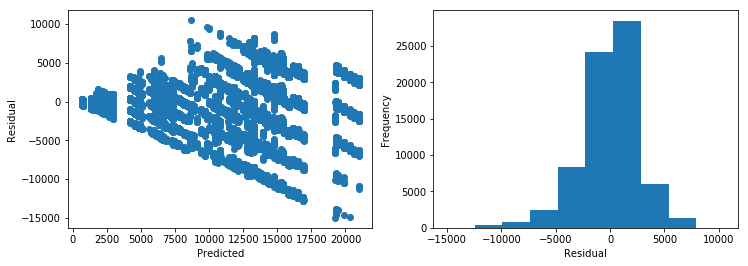

In [121]:
bsts = xgboost_cluster_data(X_cl_trains, X_cl_tests, y_cl_trains, y_cl_tests)
for i, bst, X_cl_tr, y_cl_tr in zip(range(len(bsts)), bsts, X_cl_trains, y_cl_trains):
    plot_residuals(bst, X_cl_tr, y_cl_tr)